In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import time
import pandas as pd
import traitlets.utils.bunch
from sklearn.datasets import load_iris
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:
def process_abalone_ternary():
    df = pd.read_csv('data/abalone.data', names=["Sex", "Length", "Diameter", "Height",
                                                 "Whole weight", "Shucked weight", "Viscera weight",
                                                 "Shell weight", "Rings"])
    df = df[(df["Height"] != 1.13) & (df['Height'] != 0.515)]

    # deal with categorical data
    df.loc[df.Sex == 'M', 'Male'] = 1.
    df.loc[df.Sex == 'F', 'Female'] = 1.
    df.loc[df.Sex == 'I', 'Infant'] = 1.
    df.fillna(0, inplace=True)

    # bucketize rings
    df.loc[df.Rings < 11, 'Rings'] = 1.
    df.loc[(df.Rings < 21) & (df.Rings > 10), 'Rings'] = 2.
    df.loc[df.Rings > 20, 'Rings'] = 3.

    return traitlets.Bunch(
        data=df[['Male', 'Female', 'Infant', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
                 'Viscera weight', 'Shell weight']].values,
        target=df[['Rings']].values,
        target_names=df["Rings"].unique(),
        DESCR='abalone dataset...',
        feature_names=['Male', 'Female', 'Infant', "Length", "Diameter", "Height",
                       "Whole weight", "Shucked weight", "Viscera weight",
                       "Shell weight"],
    )

data = process_abalone_ternary()
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, \
                                                    test_size = 0.2, random_state = 3)

# Normalize feature data
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train, columns=['value'])

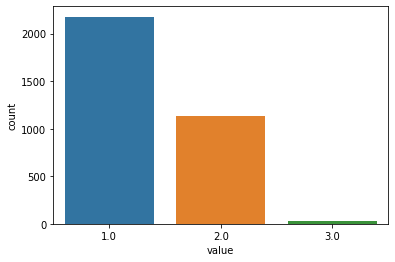

In [82]:
sns.countplot(x='value', data=y_train_df)

In [98]:
grouped = y_train_df.groupby(['value'])

In [101]:
grouped.agg(name=('value', np.size))

,name
value,
1.0,2178.0
2.0,1131.0
3.0,31.0


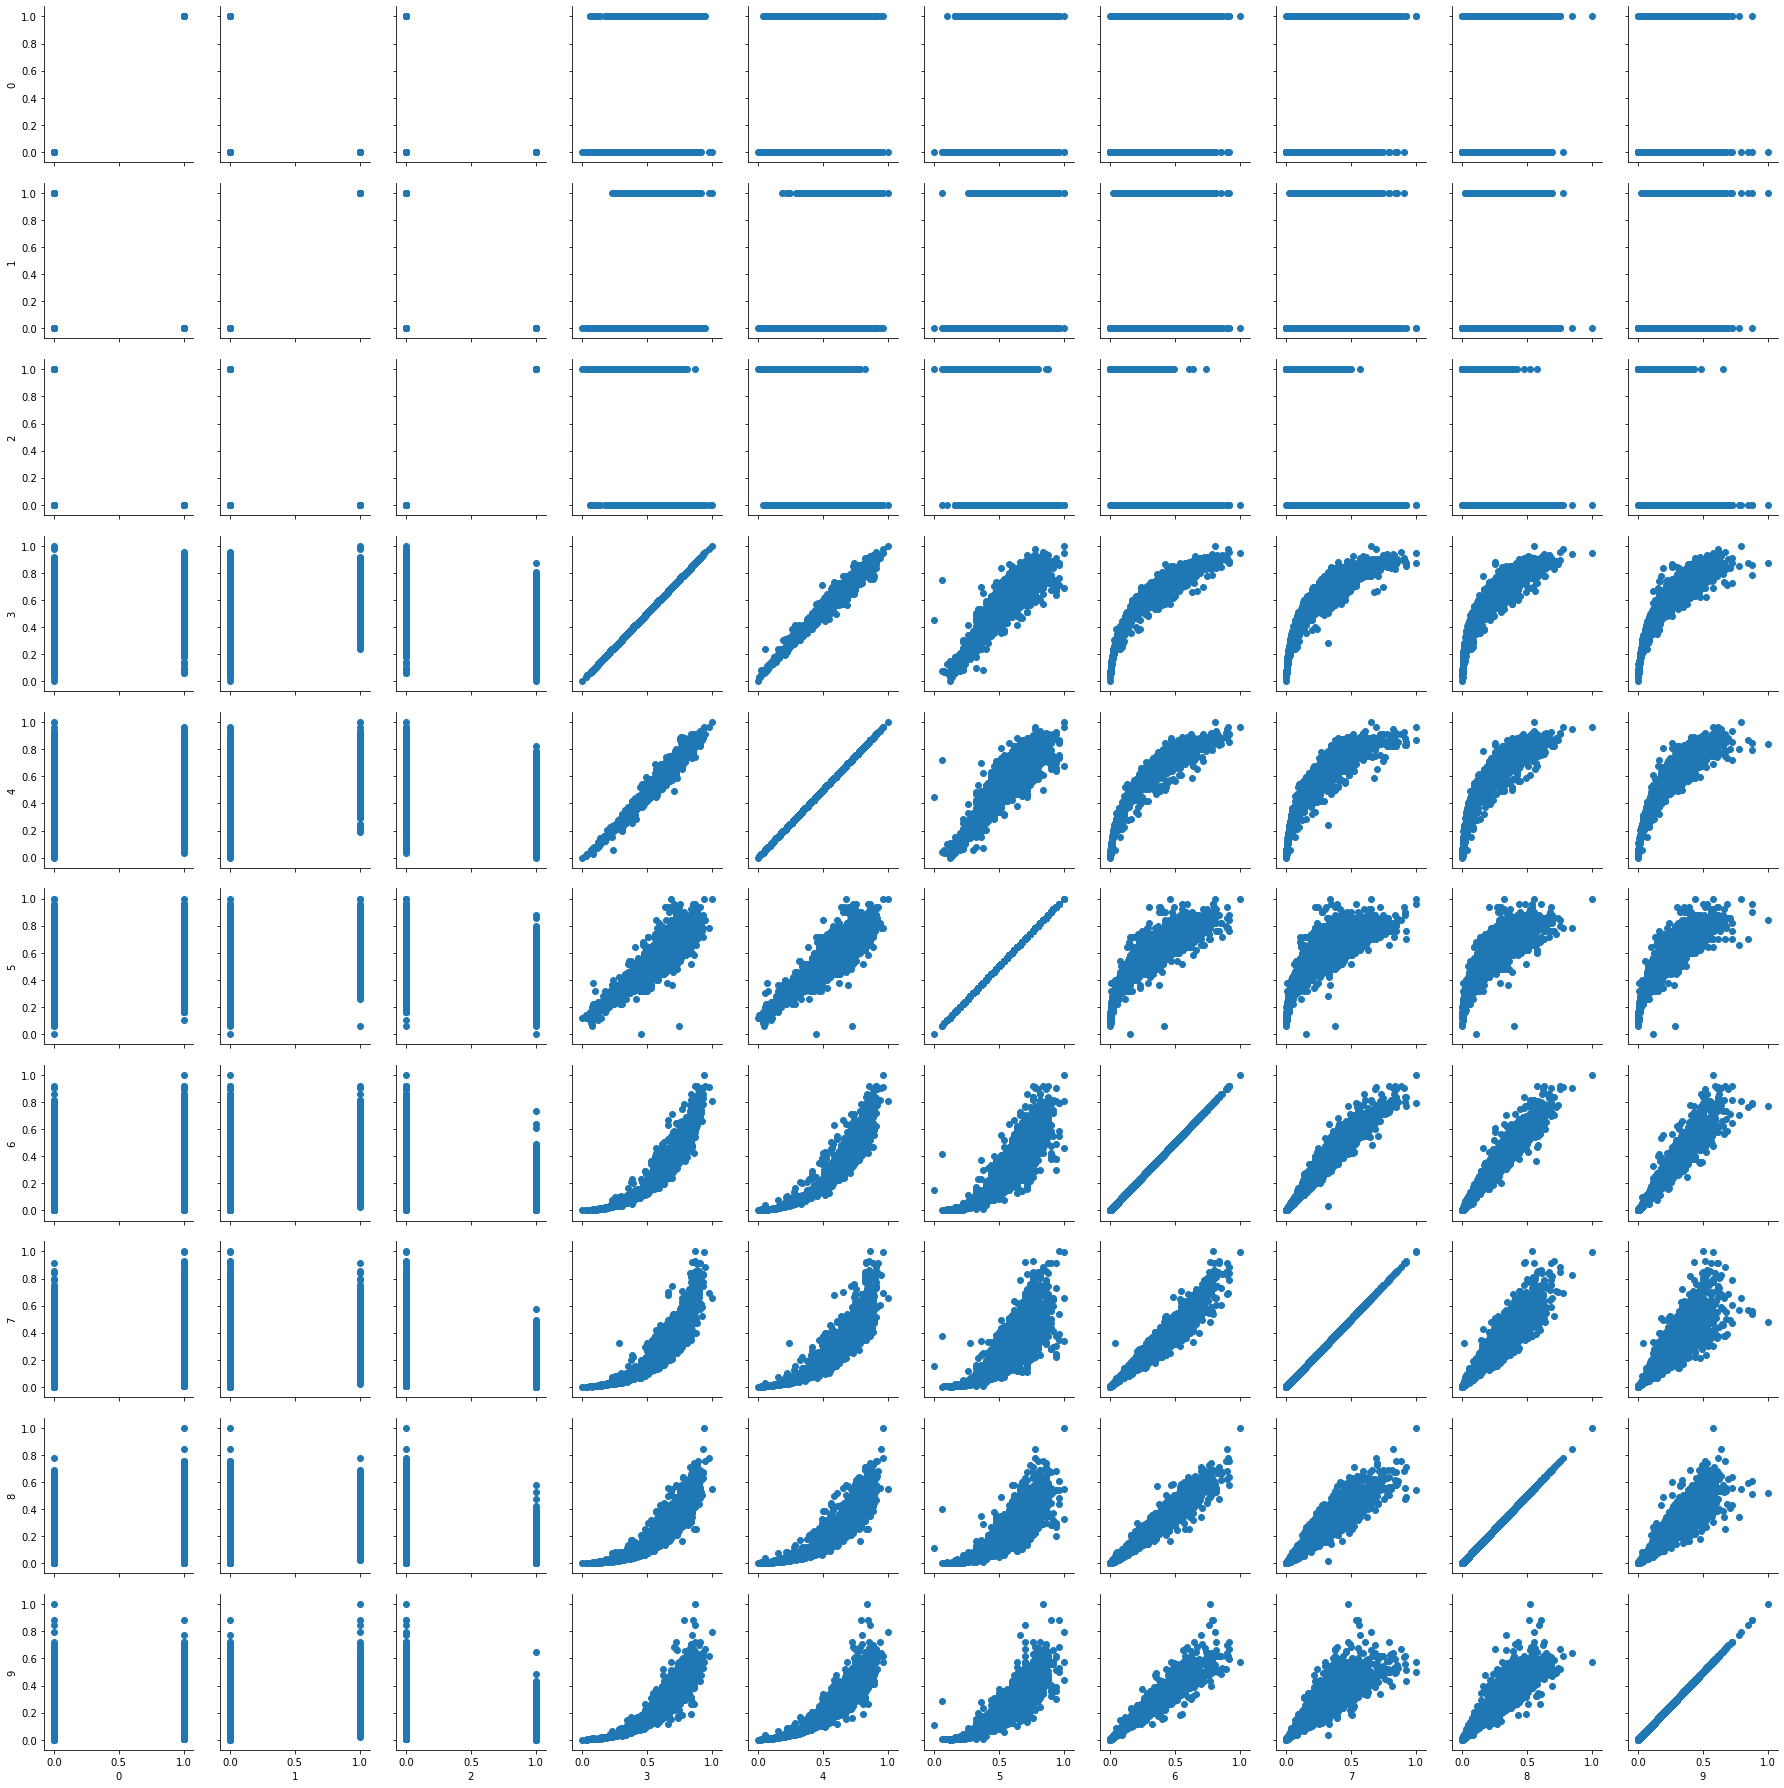

In [107]:
g = sns.PairGrid(X_train_df)
g.map(plt.scatter);

In [148]:
from sklearn import datasets
data = datasets.load_iris()
X = data.data
y = data.target
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [149]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [150]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [151]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [152]:
kmeans.inertia_

78.85144142614601

In [153]:
kmeans.n_iter_

4

In [164]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X_train_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [165]:
kmeans.labels_

array([2, 0, 1, ..., 0, 1, 0], dtype=int32)

In [167]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer


model = KMeans
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(X_train_scaled)        
visualizer.show()

ModuleNotFoundError: No module named 'yellowbrick'

In [34]:
df = pd.read_csv('out/gs-ann-results-abalone-ternary-ica.csv')

In [35]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.687674,0.552590,0.001970,0.000188,0.00001,"(50, 50, 50)","{'alpha': 1e-05, 'hidden_layer_sizes': (50, 50...",0.494790,0.481766,0.494885,0.523575,0.504649,0.499921,0.013873,18
1,3.730129,0.285200,0.003170,0.000187,0.00001,"(100, 100, 100)","{'alpha': 1e-05, 'hidden_layer_sizes': (100, 1...",0.502957,0.497774,0.486956,0.529780,0.513959,0.506274,0.014609,7
2,4.629913,1.181687,0.004693,0.000864,0.00001,"(150, 150, 150)","{'alpha': 1e-05, 'hidden_layer_sizes': (150, 1...",0.496403,0.473844,0.505155,0.517197,0.511735,0.500856,0.015185,15
3,5.709932,1.615197,0.005467,0.000812,0.00001,"(200, 200, 200)","{'alpha': 1e-05, 'hidden_layer_sizes': (200, 2...",0.496039,0.489581,0.506847,0.531980,0.508192,0.506513,0.014473,6
4,6.594749,0.659620,0.006289,0.000305,0.00001,"(250, 250, 250)","{'alpha': 1e-05, 'hidden_layer_sizes': (250, 2...",0.509693,0.491820,0.503403,0.522331,0.519283,0.509299,0.011041,2
5,1.427260,0.561381,0.002029,0.000329,0.00010,"(50, 50, 50)","{'alpha': 0.0001, 'hidden_layer_sizes': (50, 5...",0.490967,0.492477,0.491225,0.510647,0.502465,0.497547,0.007805,23
6,3.997374,0.419457,0.003245,0.000150,0.00010,"(100, 100, 100)","{'alpha': 0.0001, 'hidden_layer_sizes': (100, ...",0.500967,0.481712,0.483187,0.520683,0.506527,0.498608,0.014684,21
7,4.311421,0.944483,0.003968,0.000051,0.00010,"(150, 150, 150)","{'alpha': 0.0001, 'hidden_layer_sizes': (150, ...",0.500748,0.491820,0.502916,0.526888,0.514397,0.507342,0.012127,5
8,4.666281,0.647856,0.005000,0.000123,0.00010,"(200, 200, 200)","{'alpha': 0.0001, 'hidden_layer_sizes': (200, ...",0.511343,0.491766,0.506847,0.519974,0.508175,0.507619,0.009149,4
9,6.525986,1.282262,0.006328,0.000392,0.00010,"(250, 250, 250)","{'alpha': 0.0001, 'hidden_layer_sizes': (250, ...",0.499097,0.487341,0.506245,0.521507,0.515624,0.505951,0.012071,8
